# 数据准备

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
mnist = input_data.read_data_sets(r"D:\data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:\data\t10k-images-idx3-ubyte.gz
Extracting D:\data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
print('train',mnist.train.num_examples,',validation',mnist.validation.num_examples,',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


In [6]:
print('train images',mnist.train.images.shape,',labels:',mnist.train.labels.shape)

train images (55000, 784) ,labels: (55000, 10)


In [8]:
len(mnist.train.images[0])

784

In [9]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

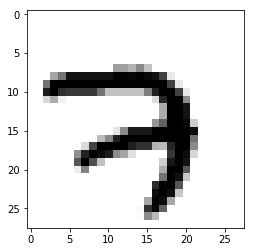

In [19]:
plot_image(mnist.train.images[0])

In [13]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
import numpy as np
np.argmax(mnist.train.labels[0])

7

In [91]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title= "label="+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

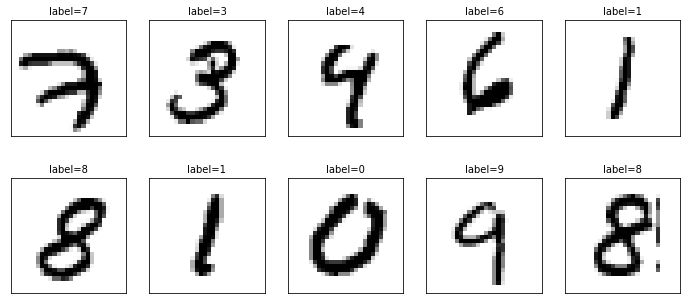

In [17]:
plot_images_labels_prediction(mnist.train.images,mnist.train.labels,[],0)

In [20]:
print('validation images',mnist.validation.images.shape,',labels:',mnist.validation.labels.shape)

validation images (5000, 784) ,labels: (5000, 10)


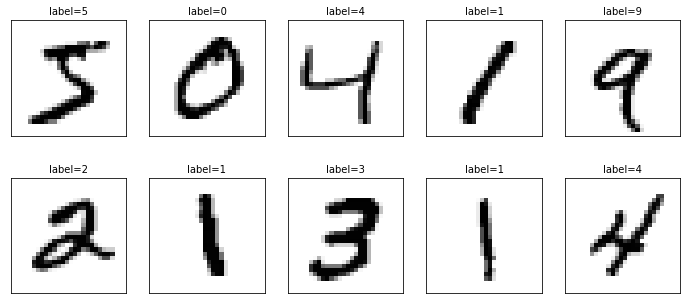

In [21]:
plot_images_labels_prediction(mnist.validation.images,mnist.validation.labels,[],0)

In [22]:
print('validation images',mnist.test.images.shape,',labels:',mnist.test.labels.shape)

validation images (10000, 784) ,labels: (10000, 10)


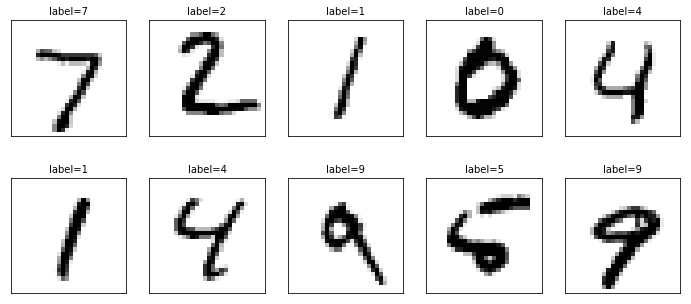

In [23]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,[],0)

In [26]:
batch_images,batch_labels=mnist.train.next_batch(batch_size=100)

In [27]:
len(batch_images),len(batch_labels)

(100, 100)

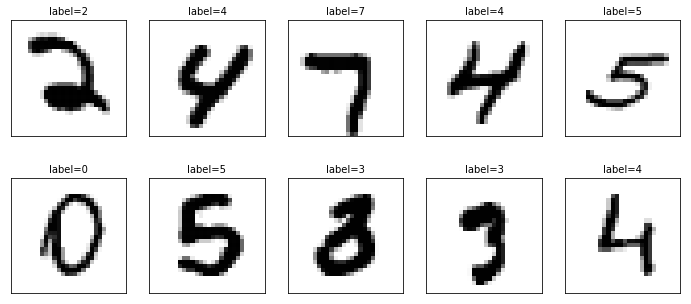

In [28]:
plot_images_labels_prediction(batch_images,batch_labels,[],0)

# Tensorflow搭建多层感知机

In [73]:
def layer(output_dim,input_dim,inputs,activation=None):
    W=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    XWb=tf.matmul(inputs,W)+b
    if activation is None:
        outputs=XWb
    else:
        outputs=activation(XWb)
    return outputs

In [93]:
# 定义x,y的占位符

In [74]:
x=tf.placeholder("float",[None,784])

In [76]:
y_label=tf.placeholder("float",[None,10])

In [95]:
# 网络模型，前向传播

In [75]:
h1=layer(output_dim=256,input_dim=784,inputs=x,activation=tf.nn.relu)
y_predict=layer(output_dim=10,input_dim=256,inputs=h1,activation=None)

- https://blog.csdn.net/tsyccnh/article/details/81069308 

In [94]:
# 计算损失

In [77]:
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict,labels=y_label))

In [96]:
# 梯度计算+反向传播

In [78]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [79]:
correction_prediction=tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [80]:
accuracy=tf.reduce_mean(tf.cast(correction_prediction,"float"))

In [81]:
trainEpochs=15
batchSize=100
totalBatchs=int(mnist.train.num_examples/batchSize)
loss_list=[]
epoch_list=[]
accuracy_list=[]
from time import time

In [88]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    startTime=time()
    for epoch in range(trainEpochs):
        for i in range(totalBatchs):
            batch_x,batch_y=mnist.train.next_batch(batchSize)
            sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        print("Train Eposh:","%02d"%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)
    duration=time()-startTime
    print("Train Finished takes:",duration)
    print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))
    prediction=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

Train Eposh: 01 Loss= 6.824162483 Accuracy= 0.85
Train Eposh: 02 Loss= 4.345806122 Accuracy= 0.8918
Train Eposh: 03 Loss= 3.415296793 Accuracy= 0.9076
Train Eposh: 04 Loss= 2.736205101 Accuracy= 0.917
Train Eposh: 05 Loss= 2.404850245 Accuracy= 0.9254
Train Eposh: 06 Loss= 2.145156145 Accuracy= 0.934
Train Eposh: 07 Loss= 1.958724260 Accuracy= 0.9352
Train Eposh: 08 Loss= 1.814348102 Accuracy= 0.9378
Train Eposh: 09 Loss= 1.658982277 Accuracy= 0.9402
Train Eposh: 10 Loss= 1.552324057 Accuracy= 0.9416
Train Eposh: 11 Loss= 1.515147924 Accuracy= 0.9444
Train Eposh: 12 Loss= 1.487279892 Accuracy= 0.9444
Train Eposh: 13 Loss= 1.483481407 Accuracy= 0.946
Train Eposh: 14 Loss= 1.382512212 Accuracy= 0.9474
Train Eposh: 15 Loss= 1.360181689 Accuracy= 0.946
Train Finished takes: 12.779345512390137
Accuracy: 0.9449


In [66]:
import matplotlib.pyplot as plt
def show_train_history(epoch_list,loss_list,title):
    fig=plt.gcf()
    fig.set_size_inches(4,2)
    plt.plot(epoch_list,loss_list,label='loss')
    plt.title(title)
    plt.ylabel("loss")
    plt.xlabel('Epoch')
    plt.legend(['loss'],loc='upper left')
    plt.show()

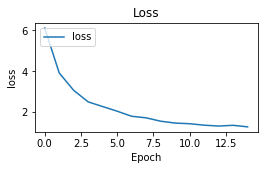

In [67]:
show_train_history(epoch_list,loss_list,"Loss")

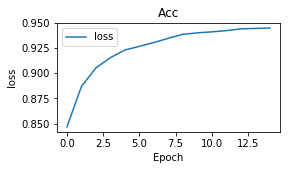

In [68]:
show_train_history(epoch_list,accuracy_list,"Acc")

In [89]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

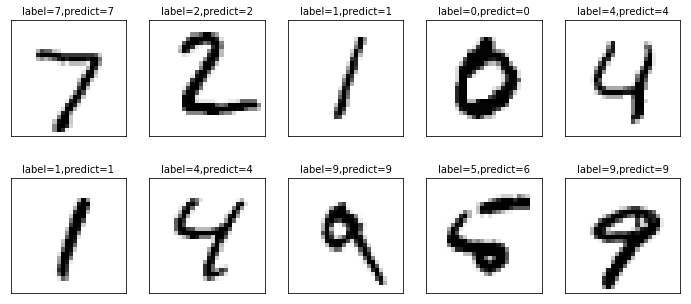

In [92]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction,0)

# 增加更多计算参数

In [97]:
def layer(output_dim,input_dim,inputs,activation=None):
    W=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    XWb=tf.matmul(inputs,W)+b
    if activation is None:
        outputs=XWb
    else:
        outputs=activation(XWb)
    return outputs

In [98]:
# 定义x,y的占位符

In [99]:
x=tf.placeholder("float",[None,784])

In [100]:
y_label=tf.placeholder("float",[None,10])

In [101]:
# 网络模型，前向传播

In [102]:
h1=layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)
y_predict=layer(output_dim=10,input_dim=1000,inputs=h1,activation=None)

- https://blog.csdn.net/tsyccnh/article/details/81069308 

In [103]:
# 计算损失

In [104]:
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict,labels=y_label))

In [105]:
# 梯度计算+反向传播

In [106]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [107]:
correction_prediction=tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [108]:
accuracy=tf.reduce_mean(tf.cast(correction_prediction,"float"))

In [109]:
trainEpochs=15
batchSize=100
totalBatchs=int(mnist.train.num_examples/batchSize)
loss_list=[]
epoch_list=[]
accuracy_list=[]
from time import time

In [110]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    startTime=time()
    for epoch in range(trainEpochs):
        for i in range(totalBatchs):
            batch_x,batch_y=mnist.train.next_batch(batchSize)
            sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        print("Train Eposh:","%02d"%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)
    duration=time()-startTime
    print("Train Finished takes:",duration)
    print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))
    prediction=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

Train Eposh: 01 Loss= 8.965852737 Accuracy= 0.8812
Train Eposh: 02 Loss= 5.887093067 Accuracy= 0.9116
Train Eposh: 03 Loss= 4.733991146 Accuracy= 0.9234
Train Eposh: 04 Loss= 3.920193672 Accuracy= 0.9322
Train Eposh: 05 Loss= 3.324578047 Accuracy= 0.9394
Train Eposh: 06 Loss= 2.881356955 Accuracy= 0.9436
Train Eposh: 07 Loss= 2.988709927 Accuracy= 0.9446
Train Eposh: 08 Loss= 2.799282312 Accuracy= 0.9436
Train Eposh: 09 Loss= 2.800203800 Accuracy= 0.9474
Train Eposh: 10 Loss= 2.586012840 Accuracy= 0.9506
Train Eposh: 11 Loss= 2.358566761 Accuracy= 0.9542
Train Eposh: 12 Loss= 2.351557016 Accuracy= 0.9596
Train Eposh: 13 Loss= 2.479421377 Accuracy= 0.9548
Train Eposh: 14 Loss= 2.214207888 Accuracy= 0.9576
Train Eposh: 15 Loss= 2.417835712 Accuracy= 0.9558
Train Finished takes: 16.54354500770569
Accuracy: 0.9528


# 增加更多隐藏层

In [112]:
def layer(output_dim,input_dim,inputs,activation=None):
    W=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    XWb=tf.matmul(inputs,W)+b
    if activation is None:
        outputs=XWb
    else:
        outputs=activation(XWb)
    return outputs

In [113]:
# 定义x,y的占位符

In [114]:
x=tf.placeholder("float",[None,784])

In [115]:
y_label=tf.placeholder("float",[None,10])

In [116]:
# 网络模型，前向传播

In [117]:
h1=layer(output_dim=1000,input_dim=784,inputs=x,activation=tf.nn.relu)
h2=layer(output_dim=1000,input_dim=1000,inputs=h1,activation=tf.nn.relu)
y_predict=layer(output_dim=10,input_dim=1000,inputs=h2,activation=None)

- https://blog.csdn.net/tsyccnh/article/details/81069308 

In [118]:
# 计算损失

In [119]:
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict,labels=y_label))

In [120]:
# 梯度计算+反向传播

In [121]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [122]:
correction_prediction=tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [123]:
accuracy=tf.reduce_mean(tf.cast(correction_prediction,"float"))

In [124]:
trainEpochs=15
batchSize=100
totalBatchs=int(mnist.train.num_examples/batchSize)
loss_list=[]
epoch_list=[]
accuracy_list=[]
from time import time

In [125]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    startTime=time()
    for epoch in range(trainEpochs):
        for i in range(totalBatchs):
            batch_x,batch_y=mnist.train.next_batch(batchSize)
            sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        print("Train Eposh:","%02d"%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)
    duration=time()-startTime
    print("Train Finished takes:",duration)
    print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))
    prediction=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

Train Eposh: 01 Loss= 137.581130981 Accuracy= 0.9144
Train Eposh: 02 Loss= 84.334022522 Accuracy= 0.9418
Train Eposh: 03 Loss= 77.858627319 Accuracy= 0.9448
Train Eposh: 04 Loss= 65.595748901 Accuracy= 0.9524
Train Eposh: 05 Loss= 56.105987549 Accuracy= 0.9548
Train Eposh: 06 Loss= 55.178764343 Accuracy= 0.9572
Train Eposh: 07 Loss= 53.039550781 Accuracy= 0.9608
Train Eposh: 08 Loss= 49.905838013 Accuracy= 0.961
Train Eposh: 09 Loss= 53.032905579 Accuracy= 0.9624
Train Eposh: 10 Loss= 47.393905640 Accuracy= 0.9646
Train Eposh: 11 Loss= 49.531845093 Accuracy= 0.9634
Train Eposh: 12 Loss= 50.720695496 Accuracy= 0.9644
Train Eposh: 13 Loss= 48.970424652 Accuracy= 0.9672
Train Eposh: 14 Loss= 46.335838318 Accuracy= 0.9674
Train Eposh: 15 Loss= 59.213256836 Accuracy= 0.9582
Train Finished takes: 21.147282600402832
Accuracy: 0.9557
